# Analiza zbioru danych - Iris


In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("../dbs/iris/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Liczba klas i ich rozkład
class_distribution = df['Species'].value_counts()
class_distribution

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
# Liczba instancji
instance_count = df.shape[0]
instance_count

150

In [24]:
# Liczba i nazwy atrybutów
attribute_count = df.shape[1] - 1  # Odejmujemy 1, ponieważ jedna kolumna to etykieta klasy
attribute_names = df.columns[:-1].tolist()  # Pomijamy kolumnę 'Species'
attribute_count, attribute_names

(5, ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

/var/folders/58/x_k_tb_50wj9t6kdymtnp5gc0000gn/T/ipykernel_3857/2960783151.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Species', data=df, palette=wine_palette)


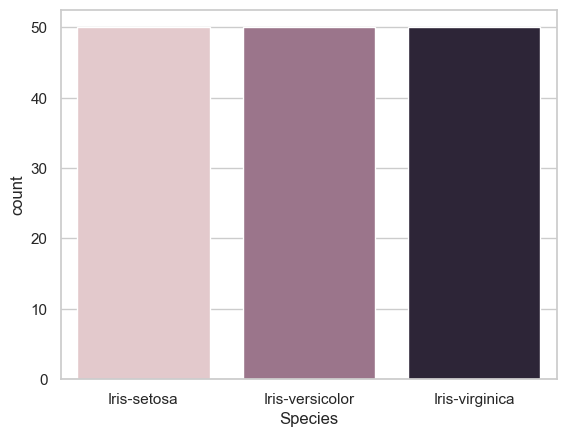

In [40]:

# sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
wine_palette = ['#E8C4C8', '#A16F8C', '#2D223A']  # Replace with the correct hex codes

sns.set_theme( style="whitegrid", palette="muted",)
# Apply the custom palette to the Iris plots
sns.countplot(x='Species', data=df, palette=wine_palette)
# sns.countplot(x='Species', data=df, hue='Species')
plt.show()

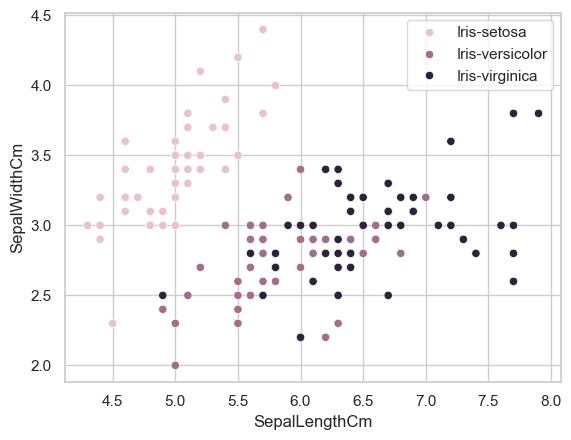

In [41]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=df, palette=wine_palette )
 
plt.legend()
plt.show()

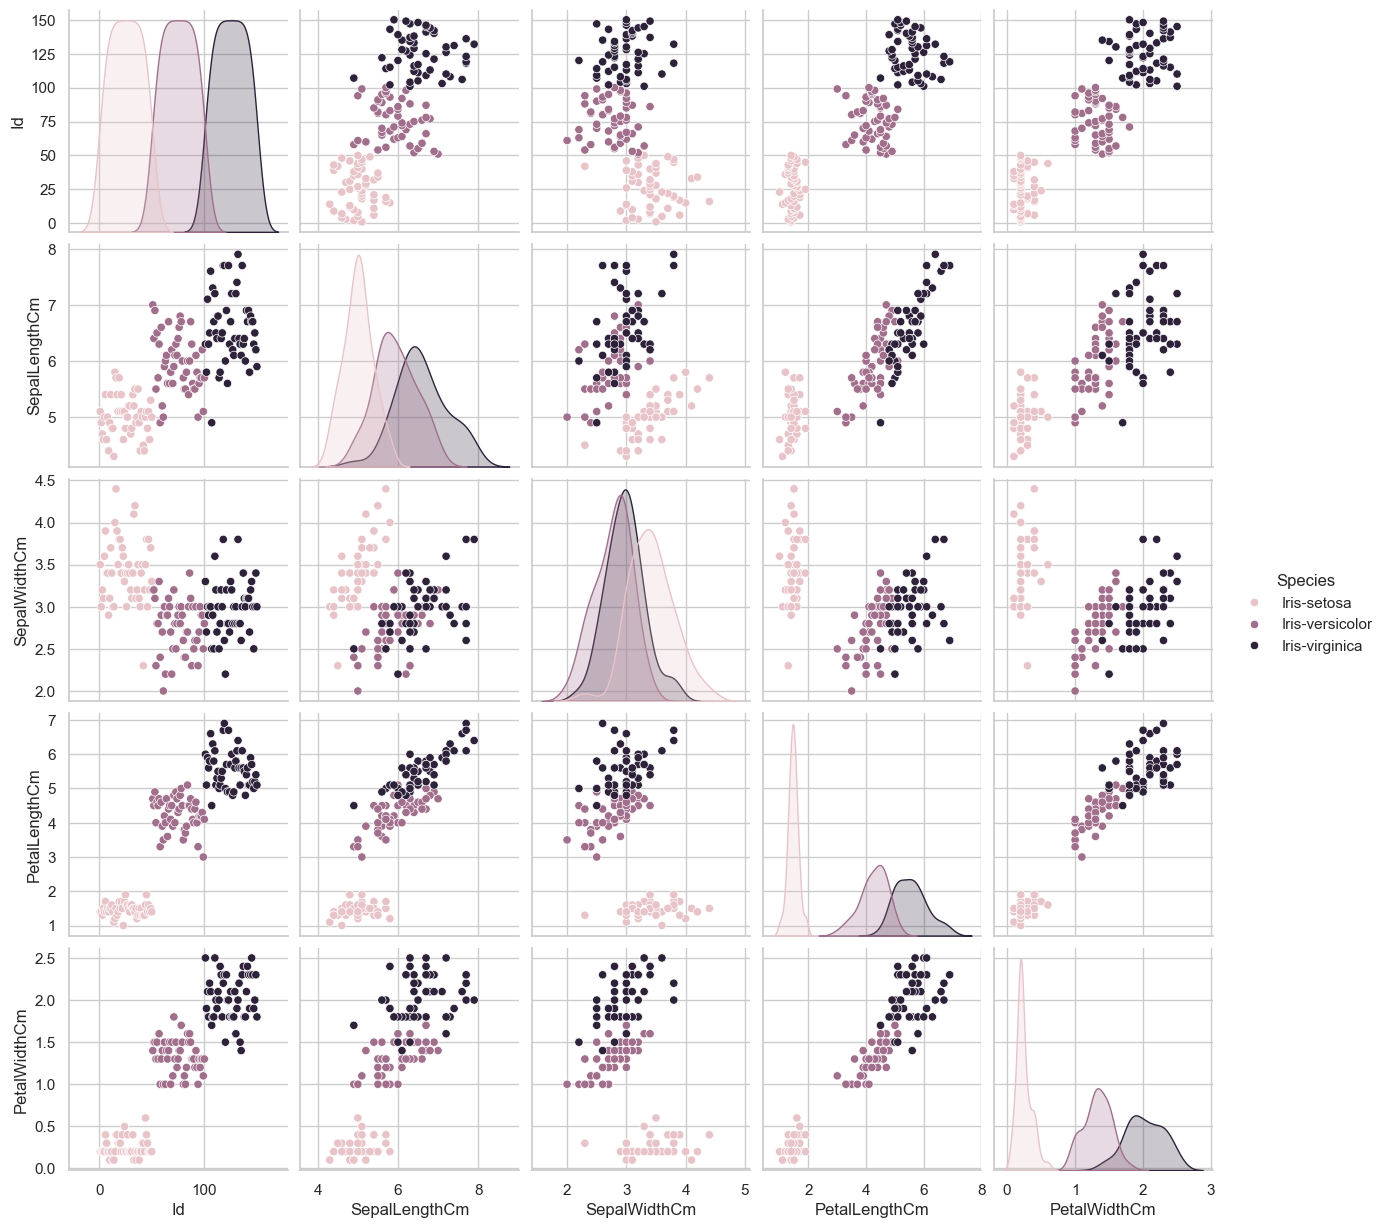

In [42]:
sns.pairplot(df, hue='Species', palette=wine_palette)
plt.show()

In [9]:
df.iloc[:,:-1].corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


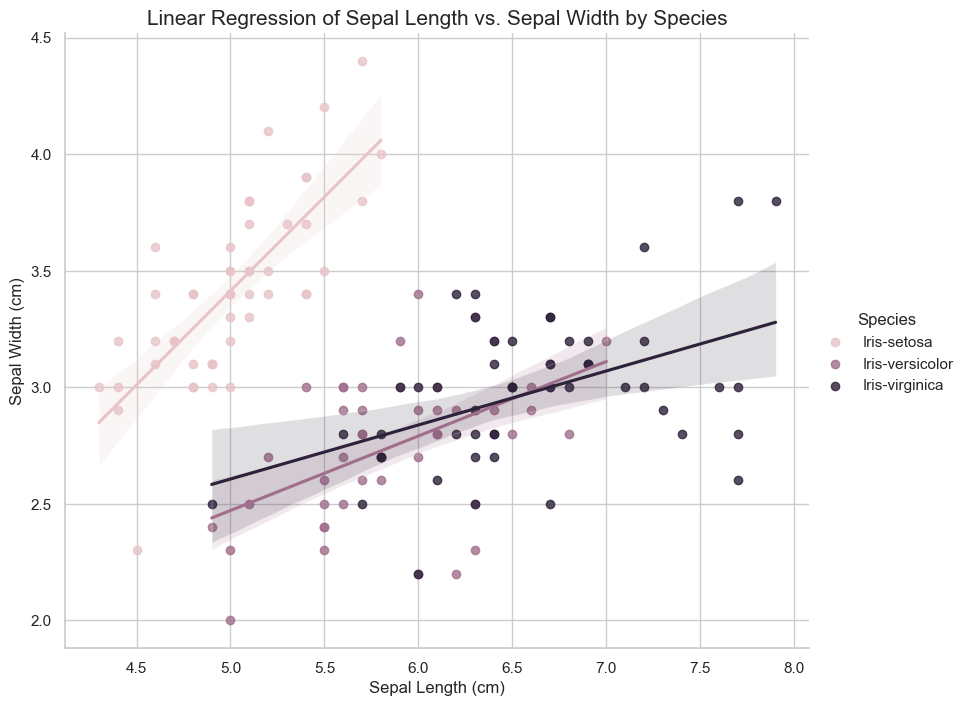

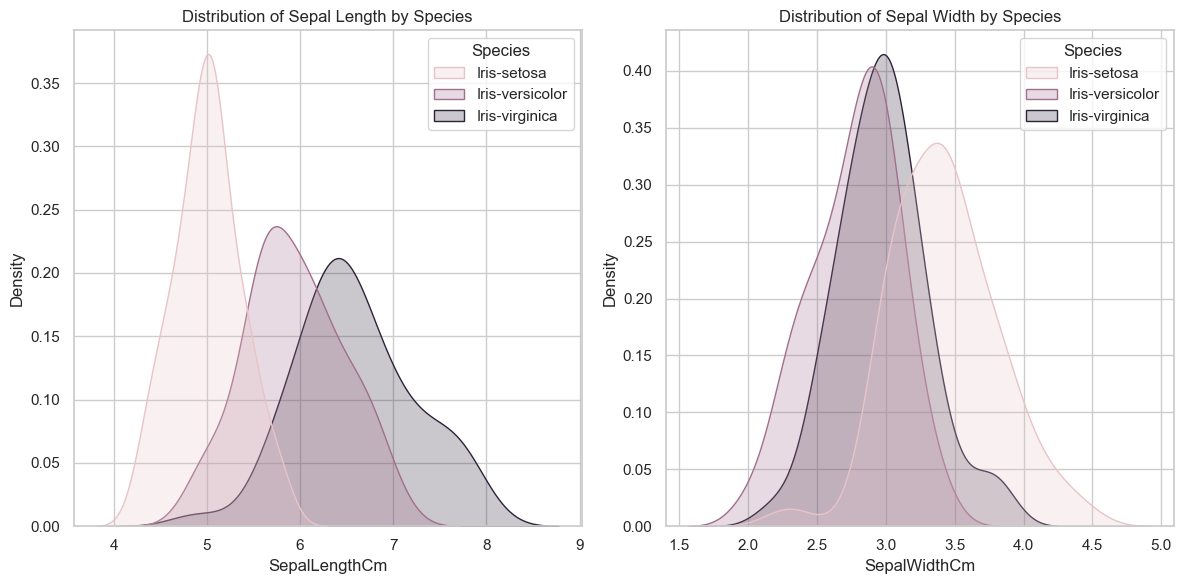

In [43]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=df, height=7, aspect=1.2, palette=wine_palette)

plt.title("Linear Regression of Sepal Length vs. Sepal Width by Species", fontsize=15)
plt.xlabel("Sepal Length (cm)", fontsize=12)
plt.ylabel("Sepal Width (cm)", fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x="SepalLengthCm", hue="Species", fill=True, palette=wine_palette)
plt.title('Distribution of Sepal Length by Species')
plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x="SepalWidthCm", hue="Species", fill=True, palette=wine_palette)
plt.title('Distribution of Sepal Width by Species')

plt.tight_layout()
plt.show()

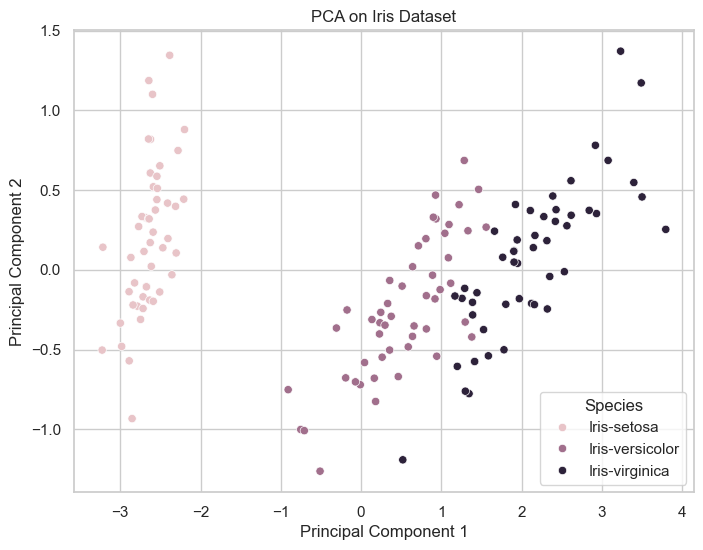

In [44]:
# Przygotowanie danych dla PCA
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = df.loc[:, features].values

# Zastosowanie PCA do redukcji wymiarów do 2
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Tworzenie DataFrame dla wyników PCA
pca_df = pd.DataFrame(data = principalComponents, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = df['Species']

# Rysowanie wykresu wyników PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Principal Component 1", y="Principal Component 2", hue="Species", data=pca_df, palette=wine_palette)
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

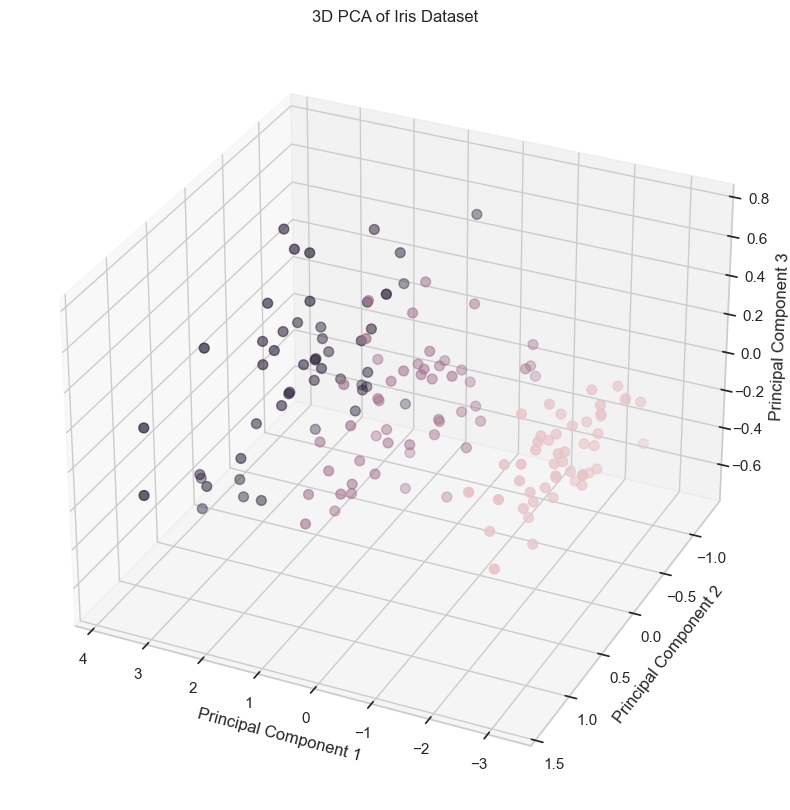

In [45]:
from mpl_toolkits.mplot3d import Axes3D

# PCA do redukcji do 3 głównych komponentów
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(x)
principalDf_3d = pd.DataFrame(
    data=principalComponents_3d,
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
)

# Dodanie etykiet klas do nowego DataFrame
finalDf_3d = pd.concat([principalDf_3d, df[['Species']]], axis=1)

# Wykres 3D PCA
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
colors = {'Iris-setosa': '#E8C4C8', 'Iris-versicolor': '#A16F8C', 'Iris-virginica': '#2D223A'}
ax.scatter(finalDf_3d['Principal Component 1'], 
           finalDf_3d['Principal Component 2'], 
           finalDf_3d['Principal Component 3'],
           c=finalDf_3d['Species'].apply(lambda x: colors[x]), s=50)

ax.view_init(elev=30, azim=115)

ax.set_title('3D PCA of Iris Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
# fig.savefig('3d-plot.png', transparent=True)
plt.show()